# ECCO Analysis

In [11]:
%load_ext watermark
%matplotlib inline

import glob

import cf_xarray as cfxr
import cf_xarray.units
import dcpy
import distributed
import gsw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pint_xarray
import scipy as sp
import tqdm
import xgcm
from IPython.display import Image

import xarray as xr
from xarray.tests import raise_if_dask_computes

%aimport eddydiff
ed = eddydiff

xr.set_options(keep_attrs=True)

plt.rcParams["figure.dpi"] = 140
plt.rcParams["savefig.dpi"] = 200
plt.style.use("ggplot")


%watermark -iv
xr.DataArray([1.0])

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
tqdm       : 4.62.3
dcpy       : 0.2.1.dev4+g05012cc.d20220325
scipy      : 1.7.3
numpy      : 1.22.0
matplotlib : 3.5.1
xgcm       : 0.6.0
cf_xarray  : 0.7.1.dev16+g7305fd8
xarray     : 0.20.3.dev137+g3f3a197c8
pint_xarray: 0.2.1
gsw        : 3.4.0
eddydiff   : 0.1
distributed: 2021.12.0



<xarray.DataArray (dim_0: 1)>
array([1.])
Dimensions without coordinates: dim_0

## DFxE_TH

In [12]:
ds = xr.open_dataset("/Users/dcherian/Downloads/DFxE_TH_2016_01_17.nc")
ds

<xarray.Dataset>
Dimensions:    (i_g: 90, k: 50, j: 90, tile: 13, time: 1, nv: 2)
Coordinates:
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z          (k) float32 ...
    timestep   (time) int64 ...
  * time       (time) datetime64[ns] 2016-01-17T12:00:00
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    DFxE_TH    (time, k, tile, j, i_g) float32 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Sep  5 19:47:53 2019
    time_coverage_start:          2016-01-17T00:00:00
    time_coverage_end:            2016-01-18T00:00:00

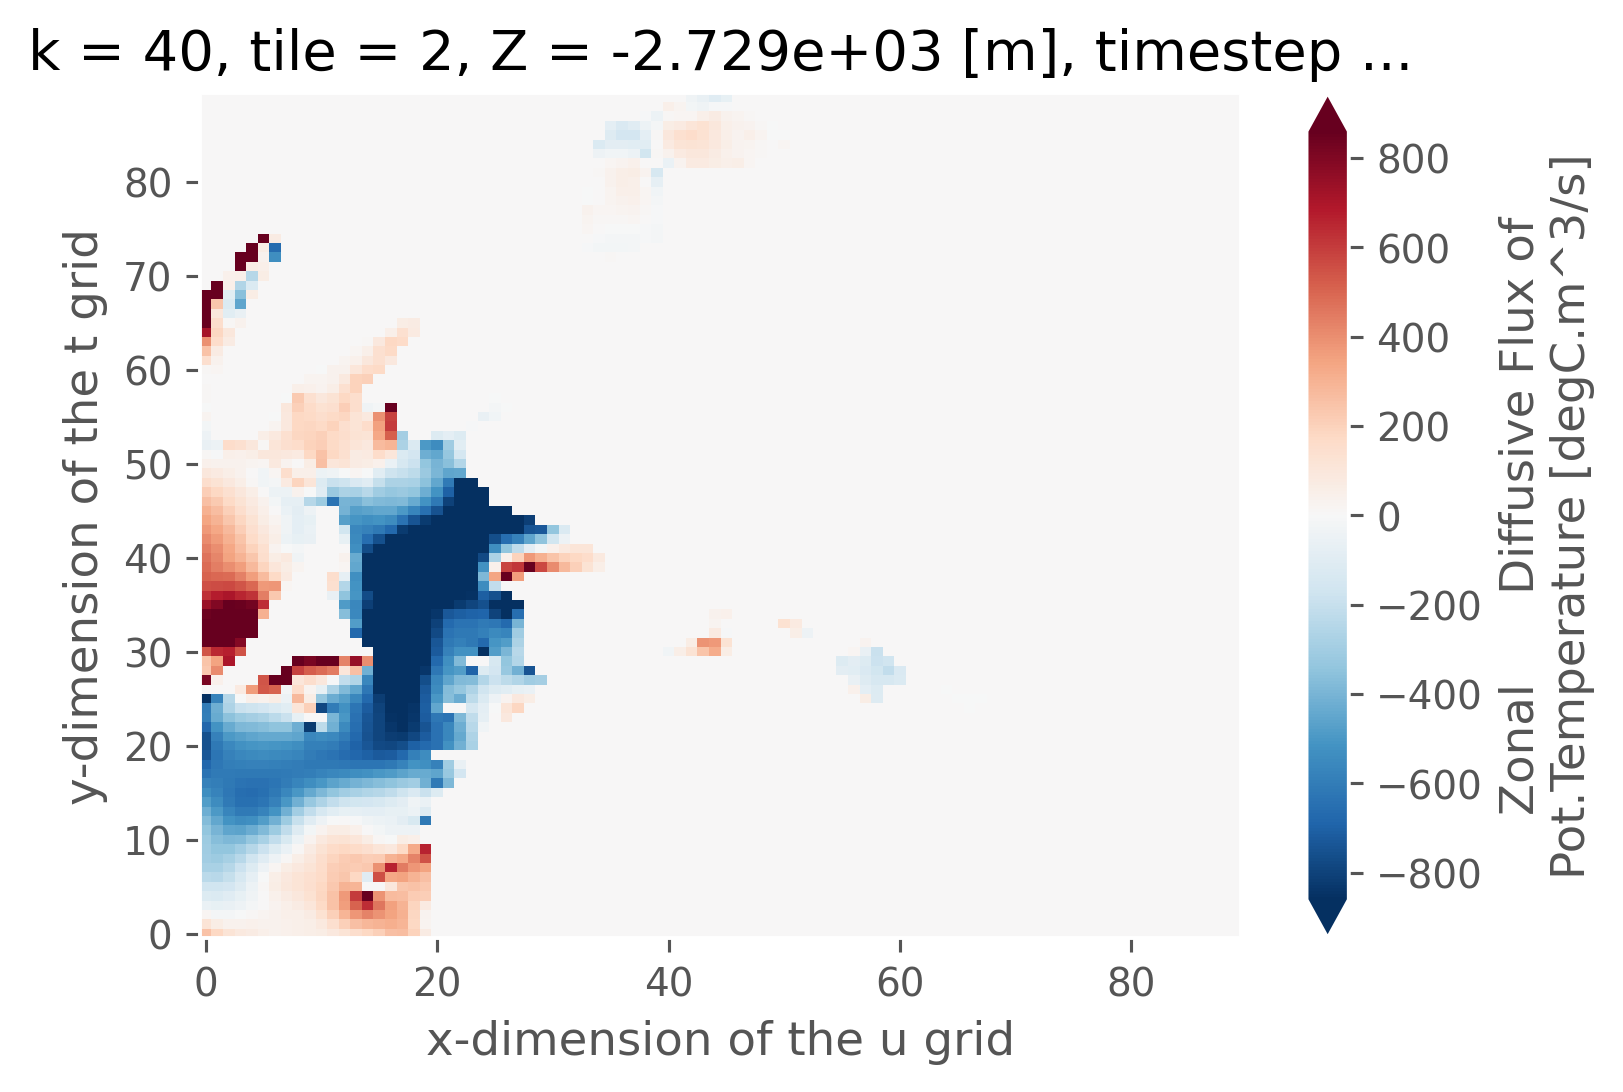

In [14]:
ds.isel(tile=2).squeeze().isel(k=40).DFxE_TH.plot(robust=True)